*1.3.1. Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.*

Евклидово расстояние между точками 1 и 2: 5.196152422706632
Расстояние городских кварталов между точками 1 и 2: 9
Расстояние Чебышева между точками 1 и 2: 3.0
Расстояние Хемминга между точками 1 и 2: 9.0


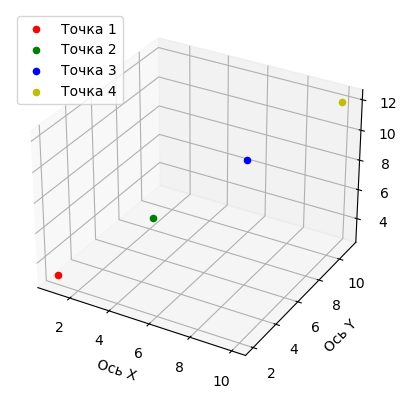

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Четыре точки в трехмерном пространстве (x, y, z)
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])
point3 = np.array([7, 8, 9])
point4 = np.array([10, 11, 12])

def distance_euclidean(point1, point2): # Евклидово расстояние
    return np.linalg.norm(point2 - point1)

def distance_manhattan(point1, point2): # Расстояние городских кварталов
    return np.sum(np.abs(point2 - point1))

def distance_chebyshev(point1, point2): # Расстояние Чебышева
    return np.linalg.norm(point2 - point1, ord=np.inf)

def distance_hemming(point1, point2): # Расстояние Хемминга
    return np.linalg.norm(point2 - point1, ord=1)

dist_eucl = distance_euclidean(point2, point1)
dist_man = distance_manhattan(point2, point1)
dist_cheb = distance_chebyshev(point2, point1)
dist_hem = distance_hemming(point2, point1)

# Выводим результаты
print(f'Евклидово расстояние между точками 1 и 2: {dist_eucl}')
print(f'Расстояние городских кварталов между точками 1 и 2: {dist_man}')
print(f'Расстояние Чебышева между точками 1 и 2: {dist_cheb}')
print(f'Расстояние Хемминга между точками 1 и 2: {dist_hem}')

# Отображаем точки в трехмерном пространстве
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*point1, c='r', label='Точка 1')
ax.scatter(*point2, c='g', label='Точка 2')
ax.scatter(*point3, c='b', label='Точка 3')
ax.scatter(*point4, c='y', label='Точка 4')

ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_zlabel('Ось Z')

plt.legend()
plt.show()

*2.3.1 Для предыдущего примера поэкспериментируйте с параметрами классификатора:*

1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Установка размера тестовой выборки 15% от всего датасета.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size = 0.15)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
99,5.7,2.8,4.1,1.3
95,5.7,3.0,4.2,1.2
118,7.7,2.6,6.9,2.3
60,5.0,2.0,3.5,1.0
109,7.2,3.6,6.1,2.5


Проверка качества моделей с разным количеством соседей. Точность.

In [11]:
from sklearn.metrics import accuracy_score

for n in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    print(n, f'model accuracy: {accuracy_score(y_test, model.predict(X_test)) : .3}')

1 model accuracy:  0.913
5 model accuracy:  0.913
10 model accuracy:  0.913


Построение графиков моделей.

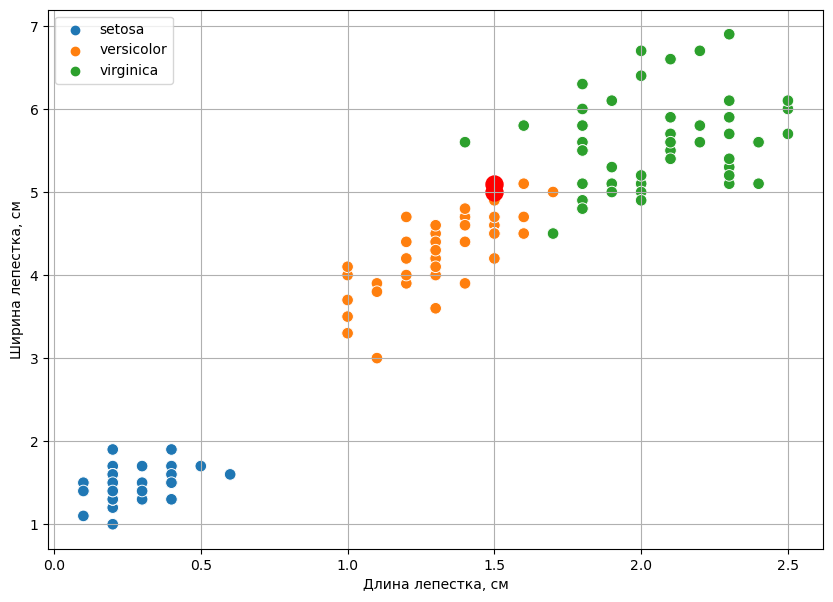

In [14]:
model_1 = KNeighborsClassifier(n_neighbors = 1)
model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x = 'petal_width', y = 'petal_length', data=iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_1[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

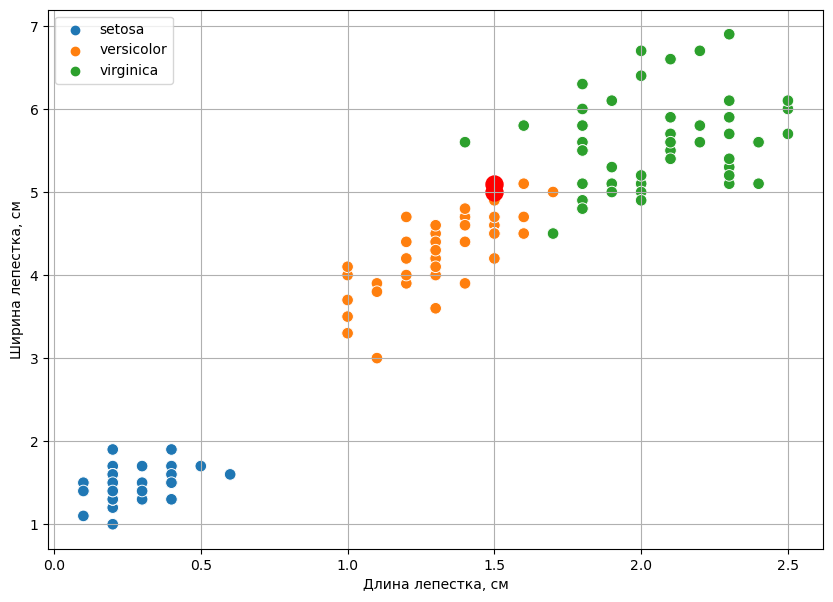

In [15]:
model_5 = KNeighborsClassifier(n_neighbors = 5)
model_5.fit(X_train, y_train)

y_pred_5 = model_5.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x = 'petal_width', y = 'petal_length', data=iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_5[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

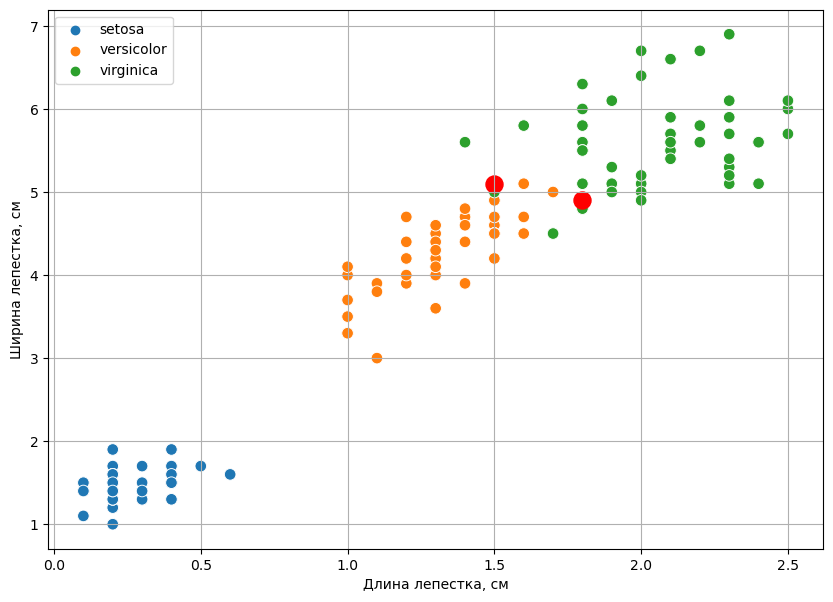

In [16]:
model_10 = KNeighborsClassifier(n_neighbors = 10)
model_10.fit(X_train, y_train)

y_pred_10 = model_10.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x = 'petal_width', y = 'petal_length', data=iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred_10[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

*3.3.2 Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.*

In [19]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"Цвет волос" : 2, "Рост" : 1, "Цвет глаз" : 1},
            {"Цвет волос" : 1, "Вес" : 2, "Цвет глаз" : 3},
            {"Цвет волос" : 2, "Вес" : 3, "Цвет глаз" : 2},
            {"Цвет волос" : 3, "Рост" : 1, "Цвет глаз" : 3}]
dictvectorizer = DictVectorizer(sparse = False)

features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 1., 2., 1.],
       [2., 0., 1., 3.],
       [3., 0., 2., 2.],
       [0., 1., 3., 3.]])